In [3]:
import numpy
import scipy.special
import matplotlib.pyplot as plt


#### Get train and test data

In [4]:
train_data = numpy.genfromtxt('mnist_train.csv', delimiter=',')

In [5]:
train_data.shape

(60000, 785)

In [6]:
test_data = numpy.genfromtxt('mnist_test.csv', delimiter = ',')

In [7]:
test_data.shape

(10000, 785)

In [8]:
#Seems already greyscaled? Why 785 vs 784

In [9]:
test_data

array([[7., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [4., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.]])

In [10]:
y_train = []
for i in range(60000):
    y_train.append(train_data[i][0])
y_train = numpy.asarray(y_train)

In [11]:
y_train

array([5., 0., 4., ..., 5., 6., 8.])

In [12]:
y_train1 = numpy.empty((60000,10))
for i in range(len(y_train)):
    ans = y_train[i]
    newList = [0.01 for i in range(10)]
    y_train1[i] = numpy.asfarray(newList)
    y_train1[i][int(ans)] = 0.99

In [13]:
y_train1[0]

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.99, 0.01, 0.01, 0.01, 0.01])

In [14]:
y_train.shape

(60000,)

In [15]:
x_train = []
for i in range(60000):
    x_train.append(train_data[i][1:])
x_train = numpy.asarray(x_train)

In [17]:
x_train.shape

(60000, 784)

In [18]:
y_test = []
for i in range(10000):
    y_test.append(test_data[i][0])
y_test = numpy.asarray(y_test)

In [19]:
y_test1 = numpy.empty((60000,10))
for i in range(len(y_test)):
    ans = y_test[i]
    newList = [0.01 for i in range(10)]
    y_test1[i] = numpy.asfarray(newList)
    y_test1[i][int(ans)] = 0.99

In [20]:
x_test = []
for i in range(10000):
    x_test.append(test_data[i][1:])
x_test = numpy.asarray(x_test)

#### Normalize data between 0.01 and 0.99

In [21]:
x_train, x_test = x_train*(0.98/255)+0.01, x_test*(0.98/255)+0.01

#### Neural Network Class

In [22]:
class neuralNetwork:
      
    # initialise the neural network
    def __init__(self, inputnodes = 784, hiddennodes=200, outputnodes=10, learningrate=0.01):
        self.inodes = inputnodes #integers
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.lr = learningrate
        #how do we make this a matrix for more than 1 layer?
        self.wih = numpy.random.normal(0.0,pow(self.inodes,-0.5),(self.hnodes,self.inodes))
        
        self.whh = numpy.random.normal(0.0,pow(self.hnodes,-0.5),(self.hnodes,self.hnodes))
        
        self.who = numpy.random.normal(0.0,pow(self.hnodes,-0.5),(self.hnodes,self.onodes))
        
        
    
    def sigmoid(self, z):
        return scipy.special.expit(z)
    
    
    def MSEerror(self, Input, Targets):
        return sum((Input-Targets)**2).mean() #is this sse?
    
        
        
    # train the neural network
    def train(self, inputs_list, targets_list, count):
        
        hidden1Output = self.sigmoid(numpy.dot(self.wih,inputs_list.T)) #output from first hidden layer
        
        hidden2Output = self.sigmoid(numpy.dot(self.whh,hidden1Output))
        
        finalOutput = self.sigmoid(numpy.dot(self.who.T,hidden2Output)) #all for one
        
        MSEerror = self.MSEerror(finalOutput,targets_list)
        
        
        #Adjust weights
        
        #output to hidden
        Error = targets_list.T - finalOutput
        
        gradientho = Error*finalOutput*(1.0-finalOutput)
        Dwo = self.lr*numpy.dot(gradientho[:,None], (hidden2Output[:,None]).T)
        self.who += Dwo.T
        
        #hidden to hidden
        hidden2Errors = numpy.dot(self.who,Error)
        gradienthh = ((hidden2Errors *hidden2Output)*(1-hidden2Output))
        self.whh += self.lr*numpy.dot(gradienthh[:,None],(hidden1Output[:,None]).T)
                      
        
        
        #Hidden Layer Error
        hidden1Errors = numpy.dot(self.whh,hidden2Errors)
        gradientih = ((hidden1Errors * hidden1Output)*(1-hidden1Output))
        self.wih += self.lr*numpy.dot(gradientih[:,None],(inputs_list[:,None]).T)
        
        return MSEerror

        
        
        
        

    
    # query the neural network
    def query(self, inputs):
        inputs = inputs.T
        
        
        hidden1Output = self.sigmoid(numpy.dot(self.wih,inputs.T)) #output from first hidden layer
        
        hidden2Output = self.sigmoid(numpy.dot(self.whh,hidden1Output))
        
        finalOutput = self.sigmoid(numpy.dot(self.who.T,hidden2Output))
        
        res = finalOutput.argmax()
        

        return res
    
    def get_accuracy(self, inputs, labels):
        correct = 0
        count = 0
        for i in range(len(inputs)):
            count +=1
            
            inputImage = inputs[i].T
            hidden1Output = self.sigmoid(numpy.dot(self.wih,inputImage)) #output from first hidden layer
            hidden2Output = self.sigmoid(numpy.dot(self.whh,hidden1Output))
            finalOutput = self.sigmoid(numpy.dot(self.who.T,hidden2Output))

            prediction = finalOutput.argmax()
            trueLabel = labels[i].argmax()
            #print(prediction,trueLabel)
            if trueLabel == prediction:
                correct+=1
        accuracy = correct/count
        return accuracy
        


#### Initial Model: 200 Hidden Nodes (default), 0.01 learning rate (default), 5 epochs

In [23]:
x_train_length = len(x_train)
x_train.shape

(60000, 784)

In [25]:
NN = neuralNetwork()
#training with 5 epochs
accuracy = []
for epoch in range(5):
    for i in range(len(x_train)):
        loss = NN.train(x_train[i], y_train1[i],i)
        #print(loss)
        if i == 59999:
            acc = NN.get_accuracy(x_test,y_test1)
            accuracy.append(acc)
            print(acc)

0.9108
0.9393
0.9543
0.9601
0.9656


([<matplotlib.axis.XTick at 0x13f12b25cc0>,
 <a list of 5 Text xticklabel objects>)

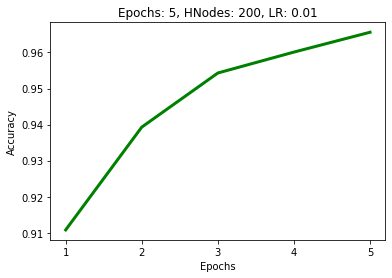

In [27]:
independent = [x for x in range(1,6)]
plt.plot(independent,accuracy, color = 'g', linewidth = 3)

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Epochs: 5, HNodes: 200, LR: 0.01")
plt.xticks(independent)

In [ ]:
epochs = [1, 5, 10, 15, 20 ]
LRs = [0.001, 0.01, 0.1, 0.2, 0.4, 0.6]

#### Optimal number of hidden nodes

0.9645
0.9662
0.9656
0.9643
0.9609
0.9604


([<matplotlib.axis.XTick at 0x13f15be4c50>,
 <a list of 6 Text xticklabel objects>)

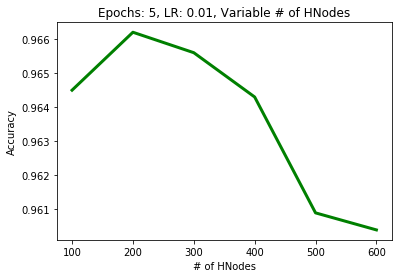

In [29]:
HNacc = []
for Nodes in range(100,601,100):
    NN1 = neuralNetwork(inputnodes = 784, hiddennodes=Nodes, outputnodes=10, learningrate=0.01)
    for epoch in range(5):
        for i in range(len(x_train)):
            loss = NN1.train(x_train[i], y_train1[i],i)
            if epoch == 4 and i == 59999:
                acc = NN1.get_accuracy(x_test,y_test1)
                HNacc.append(acc)
                print(acc)

independent = [x for x in range(100,601,100)]
plt.plot(independent,HNacc, color = 'g', linewidth = 3)

plt.xlabel("# of HNodes")
plt.ylabel("Accuracy")
plt.title("Epochs: 5, LR: 0.01, Variable # of HNodes")
plt.xticks(independent)

#### Optimal Learning Rate

0.8905
0.9633
0.9387
0.8794
0.8616
0.0974


([<matplotlib.axis.XTick at 0x13f1251aac8>,
 <a list of 6 Text xticklabel objects>)

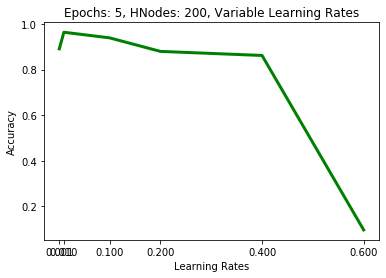

In [54]:
LRs = [0.001, 0.01, 0.1, 0.2, 0.4, 0.6]
LRacc = []
for lr in LRs:
    NN2 = neuralNetwork(inputnodes = 784, hiddennodes=200, outputnodes=10, learningrate=lr)
    for epoch in range(5):
        for i in range(len(x_train)):
            loss = NN2.train(x_train[i], y_train1[i],i)
            if epoch == 4 and i == 59999:
                acc = NN2.get_accuracy(x_test,y_test1)
                LRacc.append(acc)
                print(acc)


plt.plot(LRs,LRacc, color = 'g', linewidth = 3)

plt.xlabel("Learning Rates")
plt.ylabel("Accuracy")
plt.title("Epochs: 5, HNodes: 200, Variable Learning Rates")
plt.xticks(LRs)

#### Optimal Epochs

0.9126
0.9651
0.9683
0.9705
0.9752


([<matplotlib.axis.XTick at 0x13f11f8de80>,
 <a list of 5 Text xticklabel objects>)

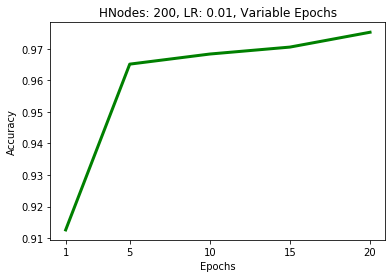

In [55]:
epochs = [1, 5, 10, 15, 20 ]
EPacc = []
for e in epochs:
    NN3 = neuralNetwork(inputnodes = 784, hiddennodes=200, outputnodes=10, learningrate=0.01)
    for epoch in range(e):
        for i in range(len(x_train)):
            loss = NN3.train(x_train[i], y_train1[i],i)
            if epoch == e-1 and i == 59999:
                acc = NN3.get_accuracy(x_test,y_test1)
                EPacc.append(acc)
                print(acc)


plt.plot(epochs,EPacc, color = 'g', linewidth = 3)

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("HNodes: 200, LR: 0.01, Variable Epochs")
plt.xticks(epochs)

#### Final Hyperparameters

Based on the hyperparameter tests, the optimal model has 200 hidden nodes, a learning rate of 0.01, and trains for 10 epochs. Increasing the epochs past 10 seemed unreasonable since it drastically increased runtime and increased accuracy by less than 1%.

In [56]:
FinalNN = neuralNetwork(inputnodes = 784, hiddennodes=200, outputnodes=10, learningrate=0.01)
FinalEpochs = 10
for epoch in range(1,FinalEpochs+1):
        for i in range(len(x_train)):
            loss = FinalNN.train(x_train[i], y_train1[i],i)
            if i == len(x_train)-1:
                acc = FinalNN.get_accuracy(x_test,y_test1)
                print("Epoch: ", epoch, "Loss: ", loss, "Accuracy: ", acc)

Epoch:  1 Loss:  0.0017119970289359787 Accuracy:  0.9337
Epoch:  2 Loss:  0.006211372264851655 Accuracy:  0.9539
Epoch:  3 Loss:  0.0010694461625841006 Accuracy:  0.9493
Epoch:  4 Loss:  0.0035156745402790948 Accuracy:  0.9509
Epoch:  5 Loss:  0.0064064144450412365 Accuracy:  0.9388
Epoch:  6 Loss:  0.00035390462118755294 Accuracy:  0.9245
Epoch:  7 Loss:  0.0002797369535185433 Accuracy:  0.9357
Epoch:  8 Loss:  0.0030068077403175375 Accuracy:  0.9406
Epoch:  9 Loss:  0.0018918568187447835 Accuracy:  0.9442
Epoch:  10 Loss:  0.005704968269317383 Accuracy:  0.9338


### Try on gimp images

Needed to import Pillow without retraining model so i pickled the trained model.

In [8]:
import pickle

In [40]:
with open('FinalNN','wb') as save_Final_NN:
    pickle.dump(FinalNN,save_Final_NN)

In [11]:
with open('FinalNN', 'rb') as Final_NN_Copy:
    # Step 3
    FinalCopy = pickle.load(Final_NN_Copy)

In [57]:
from PIL import Image

In [97]:
zero = Image.open('./Gimp Images/zero.png', 'r')
one = Image.open('./Gimp Images/one.png', 'r')
two = Image.open('./Gimp Images/two.png', 'r')
three = Image.open('./Gimp Images/three.png', 'r')
four = Image.open('./Gimp Images/four.png', 'r')
five = Image.open('./Gimp Images/five.png', 'r')
six = Image.open('./Gimp Images/six.png', 'r')
seven = Image.open('./Gimp Images/seven.png', 'r')
eight = Image.open('./Gimp Images/eight.png', 'r')
nine = Image.open('./Gimp Images/nine.png', 'r')
nine

In [135]:
pixels = list(zero.getdata())
len(pixels)

784

In [104]:
Zero = numpy.asarray(list(zero.getdata()))
One = numpy.asarray(list(one.getdata()))
Two = numpy.asarray(list(two.getdata()))
Three = numpy.asarray(list(three.getdata()))
Four = numpy.asarray(list(four.getdata()))
Five = numpy.asarray(list(five.getdata()))
Six = numpy.asarray(list(six.getdata()))
Seven = numpy.asarray(list(seven.getdata()))
Eight = numpy.asarray(list(eight.getdata()))
Nine = numpy.asarray(list(nine.getdata()))

In [131]:
Zero.shape

(784,)

In [108]:
gimpxTest = numpy.asarray([Zero,One,Two,Three,Four,Five,Six,Seven,Eight,Nine])

In [123]:
import pandas as pd

In [129]:
for i in range(len(gimpxTest)):
    pd.DataFrame(gimpxTest[i]).to_csv("%s.csv" % i)

In [109]:
gimpyTest = []
for i in range(10):
    empty = [0.01 for x in range(10)]
    empty[i] = 0.99
    gimpyTest.append(empty)
gimpyTest = numpy.asarray(gimpyTest)
gimpyTest

array([[0.99, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.99, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.99, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.99, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.99, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.99, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.99, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.99, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.99, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.99]])

In [110]:
gimpxTest = (gimpxTest*(0.98/255))+0.01

#### Try on GIMP Images

In [111]:
correct = 0
for i in range(10):
    pred = FinalNN.query(gimpxTest[i])
    label = i
    if pred == label:
        correct +=1
    print('Predicted: ', pred, 'Actual Label: ', label)
print("Accuracy: ", correct/10)
    

Predicted:  9 Actual Label:  0
Predicted:  2 Actual Label:  1
Predicted:  1 Actual Label:  2
Predicted:  9 Actual Label:  3
Predicted:  1 Actual Label:  4
Predicted:  5 Actual Label:  5
Predicted:  6 Actual Label:  6
Predicted:  2 Actual Label:  7
Predicted:  8 Actual Label:  8
Predicted:  9 Actual Label:  9
Accuracy:  0.4


#### Rotate images for new data

In [112]:
from scipy import ndimage

In [113]:
x_train2 = []
y_train2 = y_train1
for i in range(len(x_train)):
    temp = x_train[i].reshape((28,28))
    rotPos10 = scipy.ndimage.interpolation.rotate(temp,10,reshape = False)
    x_train2.append(rotPos10)
x_train2 = numpy.asarray(x_train2)

In [114]:
x_train2.shape

(60000, 28, 28)

In [115]:
x_train2 = x_train2.reshape(x_train2.shape[0], (28*28))

In [68]:
x_train2.shape

(60000, 784)

In [69]:
#add to original data
x_trainNew = numpy.append(x_train, x_train2,axis = 0)
y_train1New = numpy.append(y_train1,y_train2, axis = 0)

In [70]:
#rotate other direction

In [71]:
x_train3 = []
y_train3 = y_train1
for i in range(len(x_train)):
    temp = x_train[i].reshape((28,28))
    rotPos10 = scipy.ndimage.interpolation.rotate(temp,-10,reshape = False)
    x_train3.append(rotPos10)
x_train3 = numpy.asarray(x_train3)
x_train3 = x_train3.reshape(x_train3.shape[0], (28*28))

In [72]:
x_trainNew = numpy.append(x_trainNew, x_train3,axis = 0)
y_train1New = numpy.append(y_train1New,y_train3, axis = 0)

#### Retrain!

In [73]:
finalNN2 = neuralNetwork(inputnodes = 784, hiddennodes=200, outputnodes=10, learningrate=0.01)
FinalEpochs = 10
for epoch in range(1,FinalEpochs+1):
        for i in range(len(x_trainNew)):
            loss = finalNN2.train(x_trainNew[i], y_train1New[i],i)
            if i == len(x_trainNew)-1:
                acc = finalNN2.get_accuracy(x_test,y_test1)
                print("Epoch: ", epoch, "Loss: ", loss, "Accuracy: ", acc)

Epoch:  1 Loss:  0.001773062184074551 Accuracy:  0.9147
Epoch:  2 Loss:  0.0002446348088525113 Accuracy:  0.9319
Epoch:  3 Loss:  0.0012577097997597255 Accuracy:  0.9176
Epoch:  4 Loss:  0.0006668568459914072 Accuracy:  0.9165
Epoch:  5 Loss:  0.006240188336334062 Accuracy:  0.9191
Epoch:  6 Loss:  0.0013612554130232046 Accuracy:  0.894
Epoch:  7 Loss:  0.001897530912623373 Accuracy:  0.916
Epoch:  8 Loss:  0.003245955823909136 Accuracy:  0.8907
Epoch:  9 Loss:  0.0006585996163091671 Accuracy:  0.9002
Epoch:  10 Loss:  0.000656944208728397 Accuracy:  0.8914


In [76]:
accuracy2 = finalNN2.get_accuracy(x_test,y_test1)
accuracy2

0.8914

#### Try on GIMP Images

In [116]:
correct = 0
for i in range(10):
    pred = finalNN2.query(gimpxTest[i])
    label = i
    if pred == label:
        correct +=1
    print('Predicted: ', pred, 'Actual Label: ', label)
print("Accuracy: ", correct/10)

Predicted:  9 Actual Label:  0
Predicted:  6 Actual Label:  1
Predicted:  2 Actual Label:  2
Predicted:  3 Actual Label:  3
Predicted:  9 Actual Label:  4
Predicted:  3 Actual Label:  5
Predicted:  6 Actual Label:  6
Predicted:  3 Actual Label:  7
Predicted:  3 Actual Label:  8
Predicted:  9 Actual Label:  9
Accuracy:  0.4
